<a href="https://colab.research.google.com/github/flaviorv/ml_clustering/blob/main/clustering_at_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

###t-SNE chart of MNIST dataset

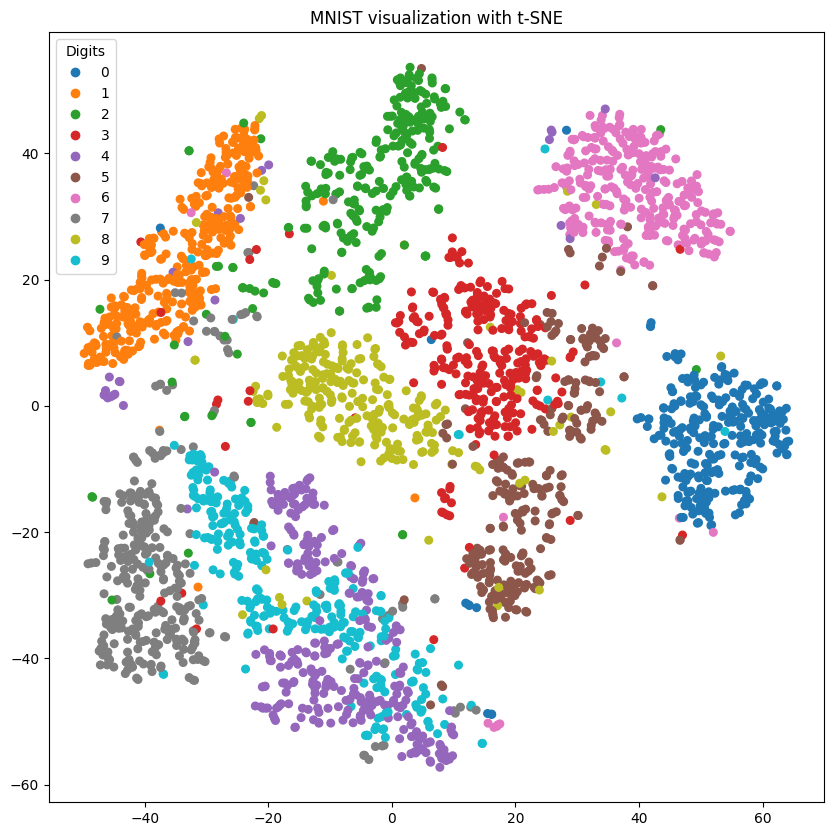

In [7]:
# Loading the dataset
def load_images(file_path):
  with open(file_path, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16)
  return data.reshape(-1, 28, 28)

def load_labels(file_path):
  with open(file_path, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=8)
  return data

try:
  labels = load_labels('train-labels.idx1-ubyte')
except:
  !wget {'https://github.com/flaviorv/ml_clustering/raw/refs/heads/main/datasets/train-labels.idx1-ubyte'}
  labels = load_labels('train-labels.idx1-ubyte')

try:
  images = load_images('train-images.idx3-ubyte')
except:
  !wget {'https://github.com/flaviorv/ml_clustering/raw/refs/heads/main/datasets/train-images.idx3-ubyte'}
  images = load_images('train-images.idx3-ubyte')

# Transforming the 3d matrix of images to 2d
s, w, h = images.shape
reshaped_images = images.reshape(s, w*h)

# Getting 3000 smaples
x, y = reshaped_images, labels
n_samples = 3000
x_subset = x[:n_samples]
y_subset = y[:n_samples]

# Applying the t-SNE to dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
x_2d = tsne.fit_transform(x_subset)

# Plotting the chart with the handwritten digits separations
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_subset.astype(int), cmap='tab10', s=30)
legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Digits")
plt.title('MNIST visualization with t-SNE')
plt.show()